<a href="https://colab.research.google.com/github/gorbo96/Simulacion/blob/main/Prueba_Simulacion_EMOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import collections
import random
import simpy
import matplotlib.pyplot as plt
import math

VELOCIDAD_LLEGADA = 3
TIEMPO_SIMULACION = 43200

lig={}
pes={}
aprob={}
recha={}

def revisionVehiculoLig(env, vehiculo, carril):
  with carril.contadorLig.request() as turno:
    yield turno
    yield env.timeout(random.randint(10,30))
    dia=math.trunc(math.trunc(env.now)/1440) 
    revision = ['Normal', 'Fallo']
    probabilidad_revision=[0.6,0.4]
    salida = random.choices(revision, probabilidad_revision, k=1)
    if(salida[0]=="Normal"):
      yield env.timeout(random.randint(1,3))
      yield env.timeout(random.randint(5,10))    
      if dia in aprob:
        aprob[dia]=aprob[dia]+1 
      else:
        aprob[dia]=1
    else:
      if dia in recha:
        recha[dia]=recha[dia]+1 
      else:
        recha[dia]=1         
    if dia in lig:
        lig[dia]=lig[dia]+1 
    else:
        lig[dia]=1
    



def revisionVehiculoPes(env, vehiculo, carril):
  with carril.contadorPes.request() as turno:
    yield turno
    yield env.timeout(random.randint(10,30))
    dia=math.trunc(math.trunc(env.now)/1440)  
    revision = ['Normal', 'Fallo']
    probabilidad_revision=[0.6,0.4]
    salida = random.choices(revision, probabilidad_revision, k=1)
    if(salida[0]=="Normal"):
      yield env.timeout(random.randint(1,3))
      yield env.timeout(random.randint(5,10))     
      if dia in aprob:
        aprob[dia]=aprob[dia]+1 
      else:
        aprob[dia]=1
    else:
      if dia in recha:
        recha[dia]=recha[dia]+1 
      else:
        recha[dia]=1         
    if dia in pes:
        pes[dia]=pes[dia]+1 
    else:
        pes[dia]=1

def llegadaClientes(env, carril):
  
  while True:
    yield env.timeout(VELOCIDAD_LLEGADA)
    vehiculo = random.choices(carril.vehiculos, carril.probabilidad, k=1)    
    yield env.timeout(random.randint(3,5))
    yield env.timeout(random.randint(1,3))
    yield env.timeout(random.randint(5,10))
    
    
    if(vehiculo[0]=="Grandes"):
      env.process(revisionVehiculoPes(env, vehiculo[0], carril))
    else:
      env.process(revisionVehiculoLig(env, vehiculo[0], carril))

Carril= collections.namedtuple('Carril', 'contadorLig,contadorPes, vehiculos, probabilidad')


env = simpy.Environment()

contadorLig = simpy.Resource(env,capacity=2)
contadorPes = simpy.Resource(env,capacity=1)
vehiculos = ['Normal', 'Grandes']
probabilidad=[0.15,0.85]
carril = Carril(contadorLig,contadorPes, vehiculos, probabilidad)
env.process(llegadaClientes(env, carril))
env.run(until=TIEMPO_SIMULACION)



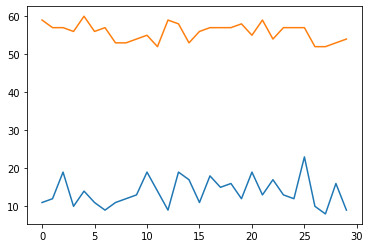

In [51]:
etiqueta = list(lig.keys())
valores = list(lig.values())
plt.plot(range(len(lig)), valores)
etiqueta = list(pes.keys())
valores = list(pes.values())
plt.plot(range(len(lig)), valores)